In [1]:
import math
import numpy as np
import sympy as sp
sp.__version__

'1.13.3'

# 1.2 Элементарные символьные вычисления

In [2]:
print(math.sqrt(5)**2 - 5) # машинная точность 
print(sp.sqrt(5)**2 - 5) # строго 0

8.881784197001252e-16
0


In [3]:
# Работая с квадратными корнями, sympy может автоматически упрощать выражения. Например, команда

print(sp.sqrt(49))
# вернет нам значение 7. Но не стоит обманываться, здесь 7 это не число. Давайте поглядим на тип этого объекта:

print(type(sp.sqrt(49)))
# в качестве ответа получим sympy.core.numbers.Integer. Т.е. мы получаем в качестве результат не число, а объект типа Integer.

# Таким образом, sympy работает не с встроенными типами языка Python, а с некоторыми специальными объектами из модуля  sympy.

7
<class 'sympy.core.numbers.Integer'>


In [4]:
# Используя автоматическое упрощение, найдите такое максимальное число, на квадрат которого делится число 987654321
sp.sqrt(987654321)

51*sqrt(379721)

In [5]:
# С помощью sympy упростите следующее выражение
3 * sp.sqrt(12) / (sp.sqrt(27) - 4 * sp.sqrt(3))

-6

# 1.3 SymPy и Символы

In [6]:
x  = sp.Symbol('x')
print(sp.sqrt(x)*sp.sqrt(x))

x


In [7]:
x = sp.Symbol('xy')
print(x**5)

xy**5


In [8]:
x, y, z, w = sp.symbols('x,y,z,w')
x + y + z + w

w + x + y + z

In [9]:
# В SymPy уже есть образцы заранее созданных переменных. 
# В подмодуле sympy.abc содержатся все латинские и греческие буквы в виде переменных.

from sympy import abc as sabc
x = sabc.x
x

x

In [10]:
# Допустим, мы хотим создать полином от переменной x. Для начала создадим переменную и зададим степень полинома:

x = sp.Symbol('x')
N = 5

# Как и в обычном питоне мы можем создавать массивы, также и в sympy мы можем создавать массивы переменных!

с = sp.symbols('c:3')

c = sp.symbols('c:{}'.format(N+1))
print(c)

a = 0
for i in range(N+1):
    a = a + c[i]*x**i
a

(c0, c1, c2, c3, c4, c5)


c0 + c1*x + c2*x**2 + c3*x**3 + c4*x**4 + c5*x**5

# 1.4 Функции sympify, evalf, subs

In [11]:
# Подставить значения можно с помощью метода subs() следующим образом:

x = sp.Symbol('x')
N = 5
a = 0
c = sp.symbols('c:{}'.format(N))
for i in range(N):
    a = a + c[i]*x**i
a.subs(x,1)

c0 + c1 + c2 + c3 + c4

In [12]:
x = sp.Symbol('x')
N = 5
a = 0
c = sp.symbols('c:{}'.format(N))
for i in range(N):
    a = a + c[i]*x**i
a.subs(c[0],1)

c1*x + c2*x**2 + c3*x**3 + c4*x**4 + 1

In [13]:
x = sp.Symbol('x')
y = sp.Symbol('y')
N = 5
a = 0
c = sp.symbols('c:{}'.format(N))
for i in range(N):
    a = a + c[i]*x**i*y**i
display(a)
a.subs(y,x)

c0 + c1*x*y + c2*x**2*y**2 + c3*x**3*y**3 + c4*x**4*y**4

c0 + c1*x**2 + c2*x**4 + c3*x**6 + c4*x**8

In [14]:
# Используя методы sympy, рассчитайте значения цепной дроби  глубины N (количество знаменателей в цепной дроби) вида 
# в точке x и округлите его до двух цифр после запятой.
# На вход подаются два числа (каждое в новой строке): N и x
# На выходе ожидается значение цепной дроби.

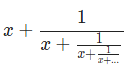

In [15]:
N = 3
val = 4

x, a = sp.symbols('x a')
a = x
for _ in range(N):
    a = x + 1 / a

display(a)

round(a.subs(x, val), 2)


x + 1/(x + 1/(x + 1/x))

4.24

In [16]:
# На вход подаются две строки и значение x (каждый ввод с новой строки). 
# Преобразуйте эти строки в выражение SymPy 
# и рассчитайте их сумму в точке x (дать ответ с точностью до двух знаков после запятой).

ex1 = '2*x + 1'
ex2 = 'x + 1'

expr1 = sp.sympify(ex1)
expr2 = sp.sympify(ex2)
x = sp.Symbol('x')

print(round((expr1 + expr2).subs(x, 1), 2))

5


# 1.5 Числа в SymPy

In [17]:
# Float - это стандартные числа с плавающей запятой\
display(sp.Float(100))
display(sp.Float(1.3323231,2))

100.000000000000

1.3

In [18]:
# Rational - это аналог рациональных чисел.
display(sp.Rational(1/2))
display(sp.Rational(2/3))
display(sp.Rational(2/3).limit_denominator(10))

1/2

6004799503160661/9007199254740992

2/3

In [19]:
# Преобразовать число типа  Float в Rational:
sp.Rational('5.92')

148/25

In [20]:
# Также мы можем извлечь числитель (a.p) и знаменатель (a.q) у Rational:

a = sp.Rational('2.5')
a.p, a.q

(5, 2)

In [21]:
# sp.S.Zero             -> специальный класс для 0
# sp.S.One              -> специальный класс для 1
# sp.S.Half             -> специальный класс для 1/2
# sp.S.NaN              -> специальный класс для nan
# sp.S.Infinity         -> специальный класс для бесконечности
# sp.oo                 -> специальный класс для бесконечности
# sp.I                  -> специальный класс для мнимой единицы
# sp.S.ImaginaryUnit    -> специальный класс для мнимой единицы

In [22]:
# На вход подается два числа: числитель (p) и знаменатель (q):

# Надо найти несократимое представление дроби. 
# В качестве ответа приведите числитель и знаменатель несократимой дроби через пробел

p, q = 12, 6

res = sp.Rational(p / q).limit_denominator(100)
res.p, res.q

(2, 1)

# 2.1 Функции в Sympy. Определение функций и логические выражения

In [23]:
# Для создания функции можно использовать функцию lambdify().
# Она позволяет создать псевдоним для некоторого символьного выражения.

x = sp.Symbol('x')
ex = (x * x + 1) / x
f = sp.lambdify(x, ex)
display(ex)
print(f(2))

(x**2 + 1)/x

2.5


In [24]:
# Такое определение прекрасно работает и с массивами:

x = sp.Symbol('x')
ex = (x * x + 1) / x 
f = sp.lambdify(x, ex)

z = np.linspace(0.1, 1, 20)
print(f(z))

[10.1         6.93308271  5.32987198  4.37254005  3.74401914  3.30559211
  2.98695025  2.74865212  2.56685946  2.42631579  2.31680348  2.23122212
  2.16448404  2.1128483   2.07350272  2.04429255  2.02353891  2.00991432
  2.00235534  2.        ]


In [25]:
# Аналогично определяются и функции от нескольких переменных:

x = sp.Symbol('x')
y = sp.Symbol('y')

ex = (x * x + y * y) / x / y
f = sp.lambdify([x, y], ex)

display(ex)

z1 = np.linspace(1, 2, 10)
z2 = np.linspace(2, 3, 10)
print(f(z1, z2))

(x**2 + y**2)/(x*y)

[2.5        2.42631579 2.36818182 2.32142857 2.28321678 2.2515528
 2.225      2.2025     2.18325792 2.16666667]


In [26]:
# sp.sin(x)  - синус
# sp.cos(x)  - косинус
# sp.exp(x)  - экспонента
# sp.sqrt(x) - квадратный корень

In [27]:
# Есть  еще  один стандартный способ создать функцию в sympy. Для этого достаточно воспользоваться функцией sp.Function():

x = sp.Symbol('x')
f = sp.Function('f')
#   Теперь f -это псевдоним для некоторой функции. 
# Такое определение бывает удобным, когда нам неизвестно аналитическое выражение для функции f(x), 
# но мы хотим производить с ней некоторые математические преобразования.

In [28]:
# Также в sympy есть и логические функции

x = sp.Symbol('x')
y = sp.Symbol('y')
z = sp.Or(x, y).subs(x, True)
z

True

In [29]:
# На вход подается две строки: 
# первая содержит операцию, 
# вторая содержит значения переменных (булевы значения). 
# Гарантируется, что операций ровно на 1 меньше чем переменных. 
# Пусть oi - операции, xi - переменные. 
# Выведите значение выражения  - переменные. 
# Выведите значение выражения x1o1x2o2x3...

from itertools import zip_longest
o = '& &'
x = 'True True True'

sp.Or(False, True)

sp.sympify(''.join([x + y for x, y in zip_longest(x.split(), o.split(), fillvalue='')]))

True

# 2.2 Упрощение вычислений и функций

In [30]:
# Функция sp.simplify(expr).  Эта функция упростит выражение (насколько это возможно).
x = sp.Symbol('x')
a = (1 - x**3) / (1 - x)
print(a) # Вернет (x**3-1)/(x-1)
print(sp.simplify(a)) # Вернет x**2+x+1

(1 - x**3)/(1 - x)


x**2 + x + 1


In [31]:
# Еще одна полезная функция - sp.expand(expr). 
# Она позволяет раскрыть скобки в произведении одного полинома на другой.

x = sp.Symbol('x')
a = (1 + x)**5
print(a) # Вернет (1+x)**5
print(sp.expand(a)) # Вернет x**5+5*x**4+10*x**3+10*x**2+5*x+1

(x + 1)**5
x**5 + 5*x**4 + 10*x**3 + 10*x**2 + 5*x + 1


In [32]:
# sp.factor(expr) - в некотором смысле обратная функция. 
# Она разлагает полином на множители с рациональными коэффициентами (факторизует его).

x = sp.Symbol('x')
a = (x**3 - 1)
print(sp.factor(a)) # Вернет (x-1)*(x**2+x+1)

(x - 1)*(x**2 + x + 1)


In [33]:
# Функция sp.cancel(expr) приводит множители к общему знаменателю для рациональных выражений.

x = sp.Symbol('x')
a = 1 / x - 1 / (x - 1)
print(sp.cancel(a)) # Вернет 1/(x-x**2)

# Для упрощения тригонометрических выражений следует использовать  sp.trigsimp(expr), 
# для операций, связанных со степенями - sp.powersimp(expr).

-1/(x**2 - x)


# 3.1 Дифференцирование функций

In [34]:
# Для начала определим некоторое выражение, от которого мы хотим взять производную.

x = sp.Symbol('x')
f = x**3 * sp.exp(-x**2 + x**5)
display(f)

sp.diff(f,x)

x**3*exp(x**5 - x**2)

x**3*(5*x**4 - 2*x)*exp(x**5 - x**2) + 3*x**2*exp(x**5 - x**2)

In [35]:
f = x**x
display(f)

sp.diff(f,x)

x**x

x**x*(log(x) + 1)

In [36]:
# Взять вторую, третью и т.д. производную:

x = sp.Symbol('x')
f = x**3*sp.exp(-x**2+x**5)
display(f)

fx = sp.diff(f,x)
display(fx)
fxx = sp.diff(fx,x)
display(fxx)

x**3*exp(x**5 - x**2)

x**3*(5*x**4 - 2*x)*exp(x**5 - x**2) + 3*x**2*exp(x**5 - x**2)

x**3*(20*x**3 - 2)*exp(x**5 - x**2) + x**3*(5*x**4 - 2*x)**2*exp(x**5 - x**2) + 6*x**2*(5*x**4 - 2*x)*exp(x**5 - x**2) + 6*x*exp(x**5 - x**2)

In [37]:
# Или же так:

x = sp.Symbol('x')
f = x**3*sp.exp(-x**2+x**5)
display(f)

fx_2 = sp.diff(f, x, 2)
display(fx_2)

display(f.diff(x, 2))

display(sp.diff(f, x, x))

x**3*exp(x**5 - x**2)

x*(6*x**2*(5*x**3 - 2) + x**2*(20*x**3 + x**2*(5*x**3 - 2)**2 - 2) + 6)*exp(x**2*(x**3 - 1))

x*(6*x**2*(5*x**3 - 2) + x**2*(20*x**3 + x**2*(5*x**3 - 2)**2 - 2) + 6)*exp(x**2*(x**3 - 1))

x*(6*x**2*(5*x**3 - 2) + x**2*(20*x**3 + x**2*(5*x**3 - 2)**2 - 2) + 6)*exp(x**2*(x**3 - 1))

In [38]:
# Частные производные с помощью diff()

x = sp.Symbol('x')
y = sp.Symbol('y')
z = sp.Symbol('z')
f = x*y*sp.exp(-(x+y+z))

sp.diff(f, x,4, y,2, z,5)
# или же sp.diff(f,x,x,x,x,y,y,z,z,z,z,z)

(-x*y + 2*x + 4*y - 8)*exp(-x - y - z)

In [39]:
# Иногда бывает полезно определять производную с отложенным расчетом. 
# Это делается с помощью Derivative()

f = sp.exp(-x**2-y**2-z**2)

fder = sp.Derivative(f, x,3, y,4, z,2)
display(fder)

# Посчитать эту производную в явном виде

fder.doit()
# В результате получим уже рассчитанную производную!

Derivative(exp(-x**2 - y**2 - z**2), (x, 3), (y, 4), (z, 2))

32*x*(-16*x**2*y**4*z**2 + 8*x**2*y**4 + 48*x**2*y**2*z**2 - 24*x**2*y**2 - 12*x**2*z**2 + 6*x**2 + 24*y**4*z**2 - 12*y**4 - 72*y**2*z**2 + 36*y**2 + 18*z**2 - 9)*exp(-x**2 - y**2 - z**2)

In [40]:
# Рассчитать производную произвольного порядка:

x = sp.Symbol('x')
m = sp.Symbol('m')
n = sp.Symbol('n')
f = sp.exp(-x**m)
f.diff((x,n))

Derivative(exp(-x**m), (x, n))

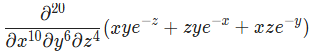

In [41]:
# Рассчитайте выражение

x, y, z = map(sp.Symbol, 'xyz')
f = x * y * sp.exp(-z) + z * y * sp.exp(-x) + x * z * sp.exp(-y)

fd_xyz = f.diff(x,10, y,6, z,4)
fd_xyz

0

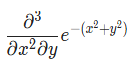

In [42]:
x, y = map(sp.Symbol, 'xy')

f = sp.exp(-(x**2 + y**2))

df_xy = f.diff(x,2, y)
print(df_xy)

display(df_xy)

4*y*(1 - 2*x**2)*exp(-x**2 - y**2)


4*y*(1 - 2*x**2)*exp(-x**2 - y**2)

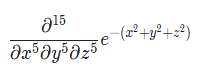

In [43]:
# Производная в точке (1,1,1). 
# Дайте ответ с точностью до 3 цифр после запятой.

x, y, z = map(sp.Symbol, 'xyz')

f = sp.exp(-(x**2 + y**2 + z**2))

df_xyz = f.diff(x,5, y,5, z,5)
display(df_xyz)

res = df_xyz.subs({x:1, y:1, z:1})
display(res)
print(res.round(3))


512*x*y*z*(-64*x**4*y**4*z**4 + 320*x**4*y**4*z**2 - 240*x**4*y**4 + 320*x**4*y**2*z**4 - 1600*x**4*y**2*z**2 + 1200*x**4*y**2 - 240*x**4*z**4 + 1200*x**4*z**2 - 900*x**4 + 320*x**2*y**4*z**4 - 1600*x**2*y**4*z**2 + 1200*x**2*y**4 - 1600*x**2*y**2*z**4 + 8000*x**2*y**2*z**2 - 6000*x**2*y**2 + 1200*x**2*z**4 - 6000*x**2*z**2 + 4500*x**2 - 240*y**4*z**4 + 1200*y**4*z**2 - 900*y**4 + 1200*y**2*z**4 - 6000*y**2*z**2 + 4500*y**2 - 900*z**4 + 4500*z**2 - 3375)*exp(-x**2 - y**2 - z**2)

512*exp(-3)

25.491


Полигамма-функция определяется как: <br> <br>
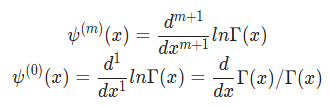

In [44]:
# Гамма-функция Эйлера
# Определите −ψ(0)(1)
# Напишите ответ с точностью до 3 знаков после запятой.

x = sp.Symbol('x')

# Полигамма-функция определяется как:
G = -sp.Derivative(sp.gamma(x),x)/sp.gamma(x); 
display(G)

G.doit().evalf(n=3, subs = {x:1})

-Derivative(gamma(x), x)/gamma(x)

0.577

In [45]:
f1 = (2-x**2)*sp.cos(x) + 2*x*sp.sin(x)
a1 = 1
f2 = sp.exp(-x**2) 
a2 = 1
f3 = sp.exp(x)+sp.exp(sp.exp(x)) 
a3 = 0
f4 = (sp.sin(x))**n*sp.cos(n*x) 
a4 = sp.pi/2
f5 = 0.25 * (sp.log(x**2 - 1)- sp.log(x**2 + 1))
a5 = 0.5
f6 = sp.exp(x)*(1+sp.cot(x)) 
a6 = sp.pi/4
f7 = sp.sin(sp.sin(sp.sin(x))) 
a7 = 0
f8 = sp.tan(x/2)-sp.cot(x/2) 
a8 = sp.pi/2
f9 = sp.log(sp.log(sp.log(x))) 
a9 = 5

x, n = sp.symbols('x n')

def get_diff(f):
    return f.diff(x)

f_lst = [f'f{i+1}' for i in range(9)]
a_lst = [f'a{i+1}' for i in range(9)]

for f, a in zip(f_lst, a_lst):
    f = eval(f)
    a = eval(a)
    res = get_diff(f)
    display(res)
    try:
        print(f'Функция: {f} \nОтвет:{res.subs(x, a).round(10)}')
    except TypeError:
        print(f'Функция: (sp.sin(x))**n*sp.cos(n*x)  \nОтвет:-n*sin(pi*n/2)')

-(2 - x**2)*sin(x) + 2*sin(x)

Функция: 2*x*sin(x) + (2 - x**2)*cos(x) 
Ответ:0.8414709848


-2*x*exp(-x**2)

Функция: exp(-x**2) 
Ответ:-0.7357588823


exp(x)*exp(exp(x)) + exp(x)

Функция: exp(x) + exp(exp(x)) 
Ответ:3.7182818285


-n*sin(x)**n*sin(n*x) + n*sin(x)**n*cos(x)*cos(n*x)/sin(x)

Функция: (sp.sin(x))**n*sp.cos(n*x)  
Ответ:-n*sin(pi*n/2)


-0.5*x/(x**2 + 1) + 0.5*x/(x**2 - 1)

Функция: 0.25*log(x**2 - 1) - 0.25*log(x**2 + 1) 
Ответ:-0.5333333333


(cot(x) + 1)*exp(x) + (-cot(x)**2 - 1)*exp(x)

Функция: (cot(x) + 1)*exp(x) 
Ответ:0


cos(x)*cos(sin(x))*cos(sin(sin(x)))

Функция: sin(sin(sin(x))) 
Ответ:1


tan(x/2)**2/2 + cot(x/2)**2/2 + 1

Функция: tan(x/2) - cot(x/2) 
Ответ:2


1/(x*log(x)*log(log(x)))

Функция: log(log(log(x))) 
Ответ:0.2611281888


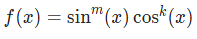

In [46]:
# На вход подается номер n - целое положительное число, m, k  
# и x - точка на действительной оси (первые три числа подаются в одной строке, x - на следующей строке). 
# Напишите программу, которая рассчитает n-ю производную функции f(x) в точке x с точностью до 5 знаков после запятой.

x = sp.Symbol('x')

# n, m, k = map(int, input().split())
n, m, k = 2, 1, 3
# a = float(input())
a = 2.1

f = sp.sin(x)**m * sp.cos(x)**k

df = f.diff(x, n)

res = df.evalf(n=5, subs = {x:a})
print(res)

-0.83762


# 3.2 Интегрирование

In [47]:
# Неопределенный интеграл:

x = sp.Symbol('x')

f = x/(x**2 + 1)
display(f)

sp.integrate(f, x)
# f.integrate(x)

x/(x**2 + 1)

log(x**2 + 1)/2

In [48]:
# Определенный интеграл:

x = sp.Symbol('x')

f = x/(x**2 + 1)
display(f)

sp.integrate(f, (x, 0, 1))

x/(x**2 + 1)

log(2)/2

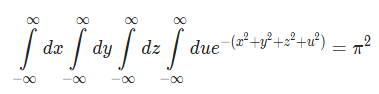

In [49]:
# Многомерный интеграл:

from sympy import oo

x = sp.Symbol('x')
y = sp.Symbol('y')
z = sp.Symbol('z')
u = sp.Symbol('u')

f = sp.exp(-(x**2+y**2+z**2+u**2))
display(f)

sp.integrate(f, (x,0,oo), (y,0,oo), (z,0,oo), (u,0,oo))

exp(-u**2 - x**2 - y**2 - z**2)

pi**2/16

In [50]:
# Создать интеграл и отложить его вычисление

x = sp.Symbol('x')
f = x * sp.log(x)
display(f)

ex = sp.Integral(f,x)
display(ex)

ex.doit()

x*log(x)

Integral(x*log(x), x)

x**2*log(x)/2 - x**2/4

In [51]:
# Взять интегралы, зависящие от параметра. 
# Для этого нужно завести еще одну переменную, но не интегрировать по ней.

x = sp.Symbol('x')
y = sp.Symbol('y')

f = 1 / (x + y)
display(f)

g = sp.integrate(f, (x,0,1))
display(g)

1/(x + y)

-log(y) + log(y + 1)

In [52]:
# В качестве предела интегрирования можно установить другую переменную

x = sp.Symbol('x')
y = sp.Symbol('y')

f = 1 / (x + y)
display(f)

g = sp.Integral(f, (x,0,y))
display(g)

g = g.doit()
display(g)

1/(x + y)

Integral(1/(x + y), (x, 0, y))

-log(y) + log(2*y)

Интеграл Гаусса (интеграл Эйлера–Пуассона) <br> <br>
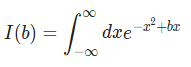

In [53]:
from sympy import oo

x, b = sp.symbols('x b')
f = sp.exp(-x**2 + b * x)

ex = sp.Integral(f, (x, -oo, oo))
display(ex)

ex.doit()

Integral(exp(b*x - x**2), (x, -oo, oo))

sqrt(pi)*(2 - erfc(b/2))*exp(b**2/4)/2 + sqrt(pi)*exp(b**2/4)*erfc(b/2)/2

Интеграл Гаусса (интеграл Эйлера–Пуассона) <br> <br>
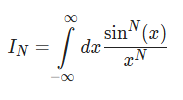

Вот его значения при некоторых N: <br> <br>
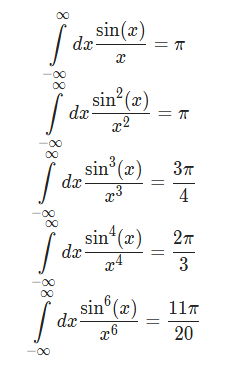

In [54]:
# Выглядит так, будто бы есть интересная закономерность. Посчитайте I5.

N = 5

x = sp.Symbol('x')
f = sp.sin(x)**N / x**N

ex = sp.Integral(f, (x, -oo, oo))
display(ex)

# res = ex.doit()
res = 115 * sp.pi / 192
display(res)

Integral(sin(x)**5/x**5, (x, -oo, oo))

115*pi/192

Интегралы Френеля <br> <br>
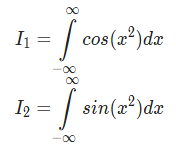

In [55]:
# Оказывается, что I1 = I2. 
# Найдите это значение.

f1 = sp.cos(x**2)
f2 = sp.sin(x**2)

I1 = sp.Integral(f1, (x,-oo, oo))
I2 = sp.Integral(f2, (x,-oo, oo))
display(I1, I2)

display(I1.doit())
display(I2.doit())

Integral(cos(x**2), (x, -oo, oo))

Integral(sin(x**2), (x, -oo, oo))

sqrt(2)*sqrt(pi)/2

sqrt(2)*sqrt(pi)/2

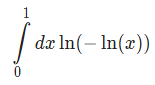

In [56]:
# Чему равна его мнимая часть?

x = sp.Symbol('x')
f = sp.log(-sp.log(x))

ex = sp.Integral(f, (x, 0, 1))
display(ex)

ex.doit()

# Мнимая часть: -pi

Integral(log(-log(x)), (x, 0, 1))

-EulerGamma - I*pi

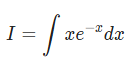

In [57]:
# Рассчитайте интеграл

x = sp.Symbol('x')
f = x * sp.exp(-x)

ex = sp.Integral(f, x)
display(ex)

res = ex.doit()
display(res)
print(res)

Integral(x*exp(-x), x)

(-x - 1)*exp(-x)

(-x - 1)*exp(-x)


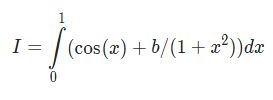

In [58]:
# Рассчитайте интеграл

x, b = sp.symbols('x b')
f = sp.cos(x) + b / (1 + x**2)

ex = sp.Integral(f, (x, 0, 1))
display(ex)

res = ex.doit()
display(res)
print(res)

Integral(b/(x**2 + 1) + cos(x), (x, 0, 1))

pi*b/4 + sin(1)

pi*b/4 + sin(1)


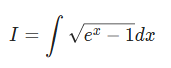

In [59]:
# Рассчитайте интеграл

x = sp.Symbol('x')
f = sp.sqrt(sp.exp(x) - 1)

ex = sp.Integral(f)
display(ex)

res = ex.doit()
display(res)
print(res)

Integral(sqrt(exp(x) - 1), x)

2*sqrt(exp(x) - 1) - 2*atan(sqrt(exp(x) - 1))

2*sqrt(exp(x) - 1) - 2*atan(sqrt(exp(x) - 1))


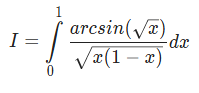

In [60]:
# Рассчитайте интеграл

x = sp.Symbol('x')
f = sp.asin(sp.sqrt(x)) / sp.sqrt(x * (1 - x))

ex = sp.Integral(f, (x,0,1))
display(ex)

res = ex.doit()
display(res)
print(res)

Integral(asin(sqrt(x))/sqrt(x*(1 - x)), (x, 0, 1))

pi**2/4

pi**2/4


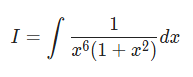

In [61]:
# Рассчитайте интеграл

x = sp.Symbol('x')
f = 1 / (sp.Pow(x, 6) * (1 + sp.Pow(x, 2)))

ex = sp.Integral(f)
display(ex)

res = ex.doit()
display(res)
print(res)

Integral(1/(x**6*(x**2 + 1)), x)

-atan(x) + (-15*x**4 + 5*x**2 - 3)/(15*x**5)

-atan(x) + (-15*x**4 + 5*x**2 - 3)/(15*x**5)


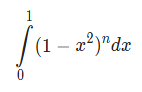

In [62]:
# Найдите значение интеграла как функцию от n. (Гамма-функцию в ответе записывать как gamma(x))

x, n = sp.symbols('x n')
f = (1 - x**2)**n

ex = sp.Integral(f, (x,0,1))
display(ex)

res = ex.doit()
display(res)
print(res)

Integral((1 - x**2)**n, (x, 0, 1))

hyper((1/2, -n), (3/2,), 1)

hyper((1/2, -n), (3/2,), 1)


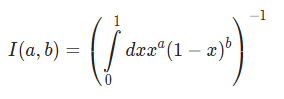

In [63]:
# Для заданных двух чисел рассчитайте следующую функцию
# Ввод: a и b - неотрицательные целые числа (каждое с новой строки).
# Вывод: Значение функции I(a,b)
# a, b = int(input()), int(input())
a = 1
b = 1

x = sp.Symbol('x')

f = x**a * (1 - x)**b

ex = sp.Integral(f, (x,0,1))
display(ex)

res = 1 / ex.doit()
display(res)

Integral(x*(1 - x), (x, 0, 1))

6

In [64]:
# Не все интегралы подвластны sympy
# Однако, мы всегда можем попросить sympy произвести численный расчет.

import sympy.abc as sabc
x = sabc.x
y = sabc.y
f = sp.exp(-sp.sqrt(x**2+y**2))
ex = sp.integrate(f,(x,0,sp.oo))
ex.subs(y,1).evalf()
# Сам интеграл символьно не посчитается, но вот последняя строчка выдаст численный результат.

0.601907230197235

# 3.3 Интегральные преобразования

Преобразование Меллина <br> <br>
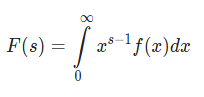

In [65]:
# Осуществить преобразование Меллина в SymPy можно с помощью функции mellin_transform():

x = sp.Symbol('x')
s = sp.Symbol('s')

display(sp.mellin_transform(sp.sin(x),x,s)[0])
print(sp.mellin_transform(sp.sin(x),x,s)) # x - переменная интегрирования, s - переменная преобразованой функции
# На выходе мы получим кортеж из трех элементов. 
# Первый элемент - функция, которая получилась в результате преобразования Меллина, 
# остальные два элемента - указывают на то, где оно сходится.

2**s*sqrt(pi)*gamma(s/2 + 1/2)/(2*gamma(1 - s/2))

(2**s*sqrt(pi)*gamma(s/2 + 1/2)/(2*gamma(1 - s/2)), (-1, 1), True)


Обратное преобразование Меллина <br> <br>
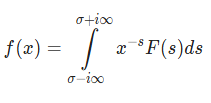

In [66]:
x = sp.Symbol('x')
s = sp.Symbol('s')
sp.inverse_mellin_transform(sp.gamma(s), s, x, (0, oo)) # последний аргумент - полоса, где определен x

exp(-x)

Преобразование Лапласа <br> <br>
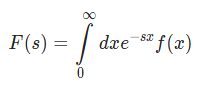

In [67]:
x = sp.Symbol('x')
s = sp.Symbol('s')
display(sp.laplace_transform(sp.sin(x),x,s)[0])
print(sp.laplace_transform(sp.sin(x),x,s)) # x - переменная интегрирования, s - переменная преобразованой функции

1/(s**2 + 1)

(1/(s**2 + 1), 0, True)


Обратное преобразование Лапласа <br> <br>
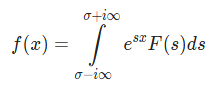

In [68]:
x = sp.Symbol('x')
s = sp.Symbol('s')
sp.inverse_laplace_transform(1/(1+s**2),s,x)# x - переменная интегрирования, s - переменная преобразованой функции

sin(x)*Heaviside(x)

Преобразование Фурье <br> <br>
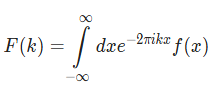

In [69]:
x = sp.Symbol('x')
k = sp.Symbol('k')
sp.fourier_transform(1/(1+x**2),x,k)

pi*exp(-2*pi*k)

Обратное преобразование Фурье <br> <br>
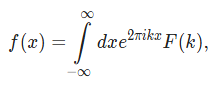

In [70]:
x = sp.Symbol('x')
k = sp.Symbol('k')
sp.inverse_fourier_transform(sp.exp(-k**2), k, x)

sqrt(pi)*exp(-pi**2*x**2)

Преобразование Ханкеля <br> <br>
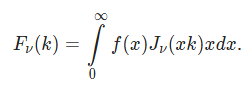

In [71]:
x = sp.Symbol('x')
k = sp.Symbol('k')
n  = sp.Symbol('n')
sp.hankel_transform(1/(1+x), x, k, n)

meijerg(((-1/2, 0), ()), ((-1/2, 0, n/2), (-n/2,)), k**2/4)/(2*pi)

Обратное преобразование Ханкеля <br> <br>
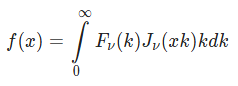

In [72]:
x = sp.Symbol('x')
k = sp.Symbol('k')
n  = sp.Symbol('n')
sp.inverse_hankel_transform(h, k, x, n)

NameError: name 'h' is not defined

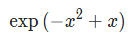

In [ ]:
# Используя преобразование Фурье, найдите результат его применения к функции
x = sp.Symbol('x')
k = sp.Symbol('k')

f = sp.fourier_transform(sp.exp(-sp.Pow(x, 2) + x),x,k)
display(f)
print(f)

sqrt(pi)*exp(-pi**2*k**2 - I*pi*k + 1/4)

sqrt(pi)*exp(-pi**2*k**2 - I*pi*k + 1/4)


In [ ]:
x, n = sp.symbols('x n')

f = sp.exp(-x**2) * sp.cos(n * x)
print(sp.fourier_transform(f, x, n))

sqrt(pi)*(exp(2*pi*n**2) + 1)*exp(-n**2*(1/4 + pi + pi**2))/2


In [ ]:
# Осуществить преобразование Меллина для положительных значений параметра s.

x = sp.Symbol('x')
s = sp.Symbol('s')

f = sp.exp(-x)
display(f)

display(sp.mellin_transform(f, x, s))
display(sp.inverse_mellin_transform(sp.gamma(s), s, x, (0, oo)))

exp(-x)

(gamma(s), (0, oo), True)

exp(-x)

In [ ]:
# Осуществить преобразование Меллина. В качестве ответа укажите длину полосы для s, в которой это преобразование существует.

x = sp.Symbol('x')
s = sp.Symbol('s')

f = sp.cos(x**2)
display(f)

display(sp.mellin_transform(f,x,s)[0])
print(res := sp.mellin_transform(f,x,s))

print(f'Длина полосы: {res[1][1] - res[1][0]}')

cos(x**2)

2**(s/2)*sqrt(pi)*gamma(s/4)/(4*gamma(1/2 - s/4))

(2**(s/2)*sqrt(pi)*gamma(s/4)/(4*gamma(1/2 - s/4)), (0, 2), True)
Длина полосы: 2


In [ ]:
# Преобразование Лапласа

x = sp.Symbol('x')
s = sp.Symbol('s')

f = 1/(1 - s**2)
display(f)

print(sp.inverse_laplace_transform(f, s, x))

1/(1 - s**2)

-exp(x)*Heaviside(x)/2 + exp(-x)*Heaviside(x)/2


# 3.4 Пределы

In [ ]:
# Функция limit()
x = sp.Symbol('x')

f = (1 + 1 / x)**x
display(f)

f_lim = sp.limit(f,x,sp.oo)
display(f_lim)

# Первым аргументом мы подаем саму функцию, 
# потом переменную, по которой мы будем брать предел, 
# последний аргумент - точка к которой мы стремим переменную.

(1 + 1/x)**x

E

In [ ]:
x = sp.Symbol('x')

f = (1 + 1 / x)**x
ex = sp.Limit(f,x,sp.oo)
display(ex)

f_lim = ex.doit()
display(f_lim)

Limit((1 + 1/x)**x, x, oo, dir='-')

E

In [ ]:
x = sp.Symbol('x')

f = sp.exp(-1/x)
display(f)

display(sp.limit(f,x,0,'+')) # Предел с правой стороны
display(sp.limit(f,x,0,'-')) # Предел с левой стороны

exp(-1/x)

0

oo

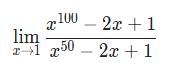

In [ ]:
x = sp.Symbol('x')

f = (x**100 - 2*x + 1) / (x**50 - 2*x + 1)
display(f)
print(sp.limit(f, x, 1))

(x**100 - 2*x + 1)/(x**50 - 2*x + 1)

49/24


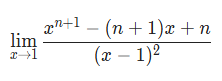

In [ ]:
x, n = sp.symbols('x n')

f = (x**(n + 1) - (n + 1) * x + n) / (x - 1)**2
display(f)
print(sp.limit(f, x, 1))

(n - x*(n + 1) + x**(n + 1))/(x - 1)**2

n**2/2 + n/2


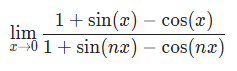

In [ ]:
x, n = sp.symbols('x n')

f = (1 + sp.sin(x) - sp.cos(x)) / (1 + sp.sin(n*x) - sp.cos(n*x))
display(f)
print(sp.limit(f, x, 0))

(sin(x) - cos(x) + 1)/(sin(n*x) - cos(n*x) + 1)

1/n


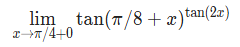

In [ ]:
x = sp.Symbol('x')

f = sp.tan((sp.pi / 8 + x)**(sp.tan(2 * x)))
ex = sp.Limit(f, x, sp.pi / 4)
display(ex)
print(ex.doit())

Limit(tan((x + pi/8)**tan(2*x)), x, pi/4, dir='+')

0


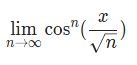

In [ ]:
x, n = sp.symbols('x n')

f = sp.cos(x / sp.sqrt(n))**n
ex = sp.Limit(f, n, oo)
display(ex)
print(ex.doit())

Limit(cos(x/sqrt(n))**n, n, oo, dir='-')

exp(-x**2/2)


In [ ]:
# На вход подаются три переменные: f,x,s
# 1)  f - строка, в которой содержится наша функция.
# 2) x - предельная точка.
# 3) s - строка, указывающая сторону, с которой мы будет подходить к предельной точке

# f = input()
# a = input()
# s = input()

f = 'sin(x)/x'
a = 0
s = '+'

x = sp.Symbol('x')

# f = sp.sin(x)/x
ex = sp.Limit(f, x, a, s)

ex.doit()

1

# 3.5 Разложение функций в ряд

In [ ]:
x = sp.Symbol('x')

f = sp.exp(x)
display(f)

a = sp.fps(f)
display(a)

# Переменная a - массив, 
# причем a[n] - это n-e слагаемое в разложении степенного ряда

print(*[f'{n}-е слагаемое: {a[n]}' for n in range(6)], sep='\n')

exp(x)

FormalPowerSeries(exp(x), x, 0, 1, (SeqFormula(Piecewise((1/factorial(_k), Eq(Mod(_k, 1), 0)), (0, True)), (_k, 1, oo)), SeqFormula(x**_k, (_k, 0, oo)), 1))

0-е слагаемое: 1
1-е слагаемое: x
2-е слагаемое: x**2/2
3-е слагаемое: x**3/6
4-е слагаемое: x**4/24
5-е слагаемое: x**5/120


In [ ]:
# Обрезать степенной ряд до необходимого количества символов. 
# Делается это командой truncate(n), где n - степень остаточного члена ряда.

x = sp.Symbol('x')
f = sp.fps(sp.cos(x))
display(f.truncate(6))

1 - x**2/2 + x**4/24 + O(x**6)

In [ ]:
# Разложим его в окрестности точки 2:

x = sp.Symbol('x')
f = sp.fps(sp.cos(x),x,2,1)
display(f.truncate(4))

cos(2) - (x - 2)*sin(2) - (x - 2)**2*cos(2)/2 + (x - 2)**3*sin(2)/6 + O((x - 2)**4, (x, 2))

In [ ]:
# Проинтегрировать ряд:

x = sp.Symbol('x')
f = sp.fps(sp.cos(x))
display(f.integrate(x).truncate(6))

x - x**3/6 + x**5/120 + O(x**6)

In [ ]:
# Можем обратить наш ряд (найти обратный степенной ряд), перемножить два ряда и многое другое:

print(f.inverse(x)) #обращение
#display(f.product(g,x) # перемножение двух степенных рядов f и g

FormalPowerSeriesInverse(FormalPowerSeries(cos(x), x, 0, 1, (SeqFormula(Piecewise(((-1/4)**(_k/2)/(RisingFactorial(1/2, _k/2)*factorial(_k/2)), Eq(Mod(_k, 2), 0)), (0, True)), (_k, 1, oo)), SeqFormula(x**_k, (_k, 0, oo)), 1)))


In [ ]:
x = sp.Symbol('x')

f = (sp.exp(x) - 1) / x
display(f)

a = sp.fps(f)
display(a)
print(a)

print(*[f'{n}-е слагаемое: {a[n]}' for n in range(6)], sep='\n')
display(a[5])

(exp(x) - 1)/x

FormalPowerSeries((exp(x) - 1)/x, x, 0, 1, (SeqFormula(Piecewise((1/RisingFactorial(2, _k), Eq(Mod(_k, 1), 0)), (0, True)), (_k, 1, oo)), SeqFormula(x**_k, (_k, 0, oo)), 1))

FormalPowerSeries((exp(x) - 1)/x, x, 0, 1, (SeqFormula(Piecewise((1/RisingFactorial(2, _k), Eq(Mod(_k, 1), 0)), (0, True)), (_k, 1, oo)), SeqFormula(x**_k, (_k, 0, oo)), 1))
0-е слагаемое: 1
1-е слагаемое: x/2
2-е слагаемое: x**2/6
3-е слагаемое: x**3/24
4-е слагаемое: x**4/120
5-е слагаемое: x**5/720


x**5/720

In [ ]:
k = 5
f = x**k / sp.factorial(k+1)
f

x**5/720

# 3.6 Ряд Фурье

In [ ]:
x = sp.Symbol('x')
f = sp.exp(x)
display(f)
serf = sp.fourier_series(f, (x, -sp.pi, sp.pi))
display(serf)
display(serf.truncate(2))

exp(x)

FourierSeries(exp(x), (x, -pi, pi), ((-exp(-pi) + exp(pi))/(2*pi), SeqFormula((_n*exp(-pi)*sin(_n*pi)/(_n**2 + 1) + _n*exp(pi)*sin(_n*pi)/(_n**2 + 1) - exp(-pi)*cos(_n*pi)/(_n**2 + 1) + exp(pi)*cos(_n*pi)/(_n**2 + 1))*cos(_n*x)/pi, (_n, 1, oo)), SeqFormula((-_n*exp(pi)*cos(_n*pi)/(_n**2 + 1) + _n*exp(-pi)*cos(_n*pi)/(_n**2 + 1) + exp(-pi)*sin(_n*pi)/(_n**2 + 1) + exp(pi)*sin(_n*pi)/(_n**2 + 1))*sin(_n*x)/pi, (_n, 1, oo))))

(-exp(-pi)/2 + exp(pi)/2)*sin(x)/pi + (-exp(pi)/2 + exp(-pi)/2)*cos(x)/pi + (-exp(-pi) + exp(pi))/(2*pi)

In [ ]:
# Выпишите первые два слагаемых в разложении в ряд Фурье функции sign(x) на промежутке (-pi/2, pi/2)

x = sp.Symbol('x')
f = sp.sign(x)
display(f)
serf = sp.fourier_series(f, (x, -sp.pi/2, sp.pi/2))
display(serf)
display(serf.truncate(2))
print(serf.truncate(2))

sign(x)

FourierSeries(sign(x), (x, -pi/2, pi/2), (0, SeqFormula(0, (_k, 1, oo)), SeqFormula(2*Piecewise((-cos(_n*pi)/_n + 1/_n, (_n > -oo) & (_n < oo) & Ne(_n, 0)), (0, True))*sin(2*_n*x)/pi, (_n, 1, oo))))

4*sin(2*x)/pi + 4*sin(6*x)/(3*pi)

4*sin(2*x)/pi + 4*sin(6*x)/(3*pi)


In [ ]:
# Выпишите первые два слагаемых в разложении в ряд Фурье функции sinh(x) на промежутке (-pi, pi)

x = sp.Symbol('x')
f = sp.sinh(x)
display(f)
serf = sp.fourier_series(f, (x, -sp.pi, sp.pi))
display(serf)
display(serf.truncate(2))
print(serf.truncate(2))

sinh(x)

FourierSeries(sinh(x), (x, -pi, pi), (0, SeqFormula(0, (_k, 1, oo)), SeqFormula((-2*_n*cos(_n*pi)*sinh(pi)/(_n**2 + 1) + 2*sin(_n*pi)*cosh(pi)/(_n**2 + 1))*sin(_n*x)/pi, (_n, 1, oo))))

sin(x)*sinh(pi)/pi - 4*sin(2*x)*sinh(pi)/(5*pi)

sin(x)*sinh(pi)/pi - 4*sin(2*x)*sinh(pi)/(5*pi)


In [ ]:
# Выпишите коэффициент a0 в разложении в ряд Фурье функции ln(x) на промежутке (1, 2)
x = sp.Symbol('x')
f = sp.log(x)
display(f)
#serf = sp.fourier_series(f, (x, 1, 2))
#display(serf)
#print(serf.truncate(1)) -1 + 2*log(2)

log(x)

# 4.1 Матрицы

In [ ]:
a = sp.Matrix([[1,2,3],[4,5,6],[7,8,9]])
a

Matrix([
[1, 2, 3],
[4, 5, 6],
[7, 8, 9]])

In [ ]:
a = sp.Matrix(3, 3, [1,2,3,4,5,6,7,8,9])
a

Matrix([
[1, 2, 3],
[4, 5, 6],
[7, 8, 9]])

In [ ]:
# a.shape               -> возвращает форму матрицы (ее размеры)
# a.row(n)              -> возвращает n-ю строку матрицы (индексация начинается с 0)
# a.col(n)              -> возвращает n-й столбец матрицы (индексация начинается с 0)
# a.row_del(n)          -> удалить n-ю строку матрицы (индексация начинается с 0)
# a.col_del(n)          -> удалить n-й столбец матрицы (индексация начинается с 0)
# a.row_insert(n,list)  -> вставить на n-е место строку list (индексация начинается с 0)
# a.col_insert(n,list)  -> вставить на n-е место столбец list (индексация начинается с 0)

In [ ]:
# a1+a2     # Сложение двух матриц
# a1-a2     # Вычитание двух матриц
# a1*a2     # Умножение двух матриц(матричное умножение)
# a.T       # Транспонирование матрицы
# a.det()   # Определитель матрицы
# a.inv()   # Обратная матрица, если она существует (если не существует, то будет выведена ошибка).
#           # В качестве аргумента можно передать метод, которым нужно считать обратную матрицу.  

In [ ]:
# Также можно создавать матрицы из коробки, как то осуществлено в NumPy и  Matematica.

# sp.eye(3)           # Единичная матрица размером (3,3)
# sp.zeros(3)         # Матрица из нулей размером (3,3)
# sp.diag(1,0,2,3,5)  # Диагональная матрица с заданными числами на диагонале 
# sp.ones(3,3)        # Матрица из единиц размером (3,3)

In [ ]:
# 1) Нулевое пространство матрицы A - это такие вектора x, что Ax = 0

a = sp.Matrix(2,2,[1,2,1,2])
display(a)
a.nullspace() # возвращает базис нулевого пространста матрицы a

Matrix([
[1, 2],
[1, 2]])

[Matrix([
 [-2],
 [ 1]])]

In [ ]:
# 2) Базис для столбцов матрицы A

a = sp.Matrix(2,2,[1,2,1,2])
display(a)
a.columnspace() # возвращает базис для набора столбцов матриц (минимальный линейно-независимый набор векторов)

Matrix([
[1, 2],
[1, 2]])

[Matrix([
 [1],
 [1]])]

In [ ]:
# 3) Собственные вектора и собственные значения матрицы (a.eigenvals() и  a.eigenvects()). 
# Первая функция возвращает словарь со значениями собственных значений и их кратностями.  
# Вторая - возвращает собственные значения и соответствующие собственные функции.
display(a.eigenvals())
display(a.eigenvects())

{3: 1, 0: 1}

[(0,
  1,
  [Matrix([
   [-2],
   [ 1]])]),
 (3,
  1,
  [Matrix([
   [1],
   [1]])])]

In [ ]:
# 4) Диагонализация матрицы - операция диагонализирует матрицу. 
# Она возвращает матрицу P и D для матрицы A, 
# где вторая матрица - диагональная матрица из собственных значений матрицы A, 
# а первая - матрица, которая диагонализует матрицу A и A = PDP**(-1).

a = sp.Matrix(2,2,[1,2,1,2])
a.diagonalize()# Возвращает матрицы P и D для матрицы A

(Matrix([
 [-2, 1],
 [ 1, 1]]),
 Matrix([
 [0, 0],
 [0, 3]]))

In [ ]:
# Матрицы на основе функций

def f(i,j):
    return i+j

sp.Matrix(3,3,f)

Matrix([
[0, 1, 2],
[1, 2, 3],
[2, 3, 4]])

In [ ]:
sp.Matrix(3, 3, lambda i, j: i + j)

Matrix([
[0, 1, 2],
[1, 2, 3],
[2, 3, 4]])

In [ ]:
def f(x):
    return sp.exp(x)

a = sp.Matrix([[0,0,1],
               [1,0,0],
               [0,1,0]])
a.applyfunc(f)

Matrix([
[1, 1, E],
[E, 1, 1],
[1, E, 1]])

In [ ]:
# Определить матрицу, состоящую из символов 
# и потом проводить вычисления с ней

x = sp.Symbol('x')
a = sp.Matrix([[0,0,x],
               [x,0,0],
               [0,x,0]])
a

Matrix([
[0, 0, x],
[x, 0, 0],
[0, x, 0]])

In [ ]:
# На вход подается три строки. 
# В первой содержатся два числа - размер матрицы, 
# во второй - числа, которые образуют матрицу.  
# Необходимо применить к матрице функцию f(x), которая подается третьей строкой.

# В качестве ответа выведите определитель такой матрицы. 
# Ответ округлите до 5 знака после запятой.

# a, b = map(int, input().split())
# lst = list(map(int, input().split()))
# f = input()

a, b = 3, 3
lst = [5, 3, 7, 5, 2, 3, 2, 3, 3]
f = 'x * x'

def func(x):
    return eval(f)

A = sp.Matrix(a, b, lst).applyfunc(func)

print(round(float(A.det()), 5))

7415.0


In [ ]:
#  Найдите определитель матрицы + единичная матрица

def func(x, y):
    return x**2 + y**2 + 1

A = sp.Matrix(10, 10, func)
display(A)

B = A + sp.eye(A.shape[0])
display(B)

print(sp.det(B))

Matrix([
[ 1,  2,  5, 10, 17,  26,  37,  50,  65,  82],
[ 2,  3,  6, 11, 18,  27,  38,  51,  66,  83],
[ 5,  6,  9, 14, 21,  30,  41,  54,  69,  86],
[10, 11, 14, 19, 26,  35,  46,  59,  74,  91],
[17, 18, 21, 26, 33,  42,  53,  66,  81,  98],
[26, 27, 30, 35, 42,  51,  62,  75,  90, 107],
[37, 38, 41, 46, 53,  62,  73,  86, 101, 118],
[50, 51, 54, 59, 66,  75,  86,  99, 114, 131],
[65, 66, 69, 74, 81,  90, 101, 114, 129, 146],
[82, 83, 86, 91, 98, 107, 118, 131, 146, 163]])

Matrix([
[ 2,  2,  5, 10, 17,  26,  37,  50,  65,  82],
[ 2,  4,  6, 11, 18,  27,  38,  51,  66,  83],
[ 5,  6, 10, 14, 21,  30,  41,  54,  69,  86],
[10, 11, 14, 20, 26,  35,  46,  59,  74,  91],
[17, 18, 21, 26, 34,  42,  53,  66,  81,  98],
[26, 27, 30, 35, 42,  52,  62,  75,  90, 107],
[37, 38, 41, 46, 53,  62,  74,  86, 101, 118],
[50, 51, 54, 59, 66,  75,  86, 100, 114, 131],
[65, 66, 69, 74, 81,  90, 101, 114, 130, 146],
[82, 83, 86, 91, 98, 107, 118, 131, 146, 164]])

-71524


In [ ]:
# Найдите обратную матрицу к матрице, в качестве ответа укажите элемент, 
# стоящий на пересечении первого столбца и первой строки (в виде рациональной дроби)

print(B.inv()[0, 0])

14048/17881


Определитель Вандермонда размера 3 <br> <br>
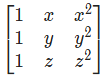

In [ ]:
# Найдите его значение, отфакторизовав его на множители

x, y, z = map(sp.Symbol, 'xyz')

det = sp.Matrix(3, 3, [1, x, x**2, 1, y, y**2, 1, z, z**2])
print(det.det())

-x**2*y + x**2*z + x*y**2 - x*z**2 - y**2*z + y*z**2


In [ ]:
# На вход подается матрица. 
# Надо найти ее минимальное и максимальное собственные значения и их кратности 
# (четыре числа через пробел: (минимальное СЗ) (его кратность) (максимальное СЗ) (его кратность)).

# Вход: две строки. 
# Первая - размер квадратной матрицы (количество строк). 
# Вторая - элементы матрицы (вся матрица вытянута в одну строку, начиная с первой строки).

# n = int(input())
# arr = input().split()

n = 2
arr = '1 2 3 4'.split()
B = sp.Matrix(arr)
A = sp.Matrix(n, n, arr)
A

Matrix([
[1, 2],
[3, 4]])

In [103]:
lst = []
for k, v in A.eigenvals().items():
    lst.append(round(k, 5))
    lst.append(v)
    print(round(k, 5), v, end=' ')
print()
print(*lst)

B = sp.Matrix(lst)
print(B)

-0.37228 1 5.37228 1 
-0.37228 1 5.37228 1
Matrix([[-0.37228], [1], [5.37228], [1]])


# 4.2 Комплексные числа и кватернионы

In [ ]:
# Мнимая единица

I = sp.I
I

I

In [ ]:
z = 1+3*I
z

1 + 3*I

In [ ]:
x = sp.Symbol('x')
y = sp.Symbol('y')
z = x+y*I
z

x + I*y

In [ ]:
# sp.re(z)          # получить действительную часть комплексного числа
# sp.im(z)          # получить мнимую часть комплексного числа
# sp.Abs(z)         # получить модуль комплексного числа
# sp.conjugate(z)   # получить сопряжение комплексного числа

In [75]:
# На вход подается комплексное число (два числа, разделенных пробелом, говорящих о действительной и мнимой части). 
# Вам нужно в качестве результата вывести:  
# модуль комплексного числа 
# и фазу сопряженного числа (в радианах) через пробел с точностью до 5 знаков.
import cmath

x, y = 1, 0.1
I = sp.I
z = x + y * I
display(z)

z_mod = sp.Abs(z)
z_phase = cmath.phase(z)

print(round(z_mod, 5), round(z_phase, 5))
print(sp.arg(z_mod))


1 + 0.1*I

1.00499 0.09967
0


In [76]:
# Квартелион

q = sp.Quaternion(1,2,3,4)
q

1 + 2*i + 3*j + 4*k

In [77]:
a = sp.Symbol('a')
b = sp.Symbol('b')
c = sp.Symbol('c')
d = sp.Symbol('d')
q = sp.Quaternion(a,b,c,d)
q

a + b*i + c*j + d*k

In [78]:
# На вход подаются две строки: 
# в первой - 4 числа, соответствующие первому кватерниону (q1), 
# во второй -  числа, соответствующие второму кватерниону (q2).

# В качестве ответа выведите четыре числа (через пробел с точностью до 5 знака), 
# соответствующие максимальному  по модулю одному из следующих кватернионов: q1+q2, q1-q2, q1*q2

# q1 = sp.Quaternion(*map(float, input().split()))
# q2 = sp.Quaternion(*map(float, input().split()))
s1 = '1.1111 1.22222 1.3333 1.4444'
s2 = '2.1 2.2 2.3 2.4'

q1 = sp.Quaternion(*map(float, s1.split()))
q2 = sp.Quaternion(*map(float, s2.split()))
qq_max = max(q1+q2, q1-q2, q1*q2, key=lambda x: x.norm())

print(*map(lambda x: x.round(5), qq_max.args))

-6.88872 4.88888 5.59981 5.57773


# 5.1 Графики

<lambdifygenerated-4>:2: RuntimeWarning: invalid value encountered in scalar divide
  return x**3/(exp(x) - 1)


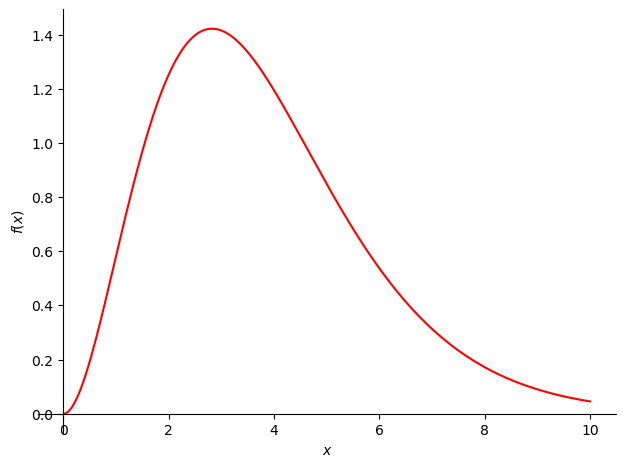

In [79]:
# Самый простой способ построить график с помощью sympy -  это использование функции sp.plot()

x = sp.Symbol('x')
a = sp.plot(x**3 / (sp.exp(x)-1),
            (x,0,10),
            line_color='red',
            show=True)

<lambdifygenerated-6>:2: RuntimeWarning: invalid value encountered in scalar divide
  return x**3/(exp(x) - 1)


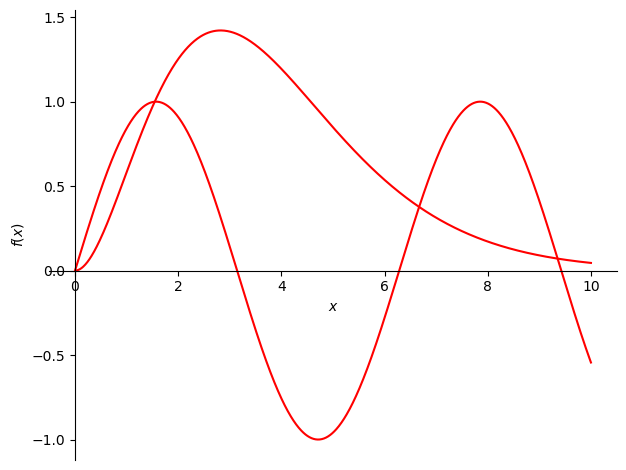

In [80]:
# Мы можем подать несколько графиков для построения

x = sp.Symbol('x')
a = sp.plot(x**3 / (sp.exp(x)-1),
            sp.sin(x),
            (x,0,10),
            line_color='red',
            show=True)

<lambdifygenerated-10>:2: RuntimeWarning: invalid value encountered in scalar divide
  return x**3/(exp(x) - 1)


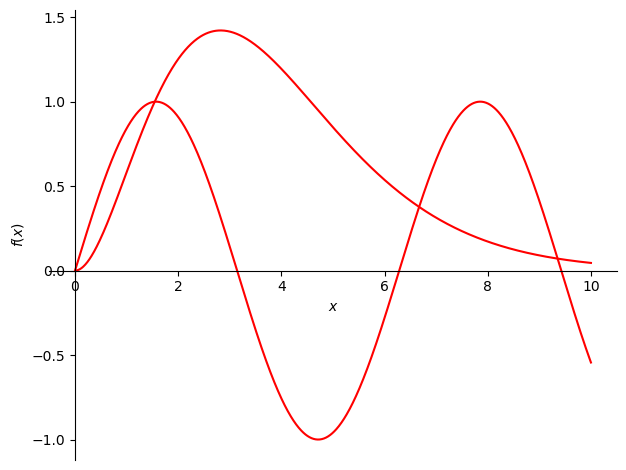

In [81]:
# Отдельно можно указать диапазон для каждого графика

x = sp.Symbol('x')
a = sp.plot((x**3 / (sp.exp(x)-1), (x,0,10)),
            (sp.sin(x), (x,0,10)),
            line_color='red',
            show=True)

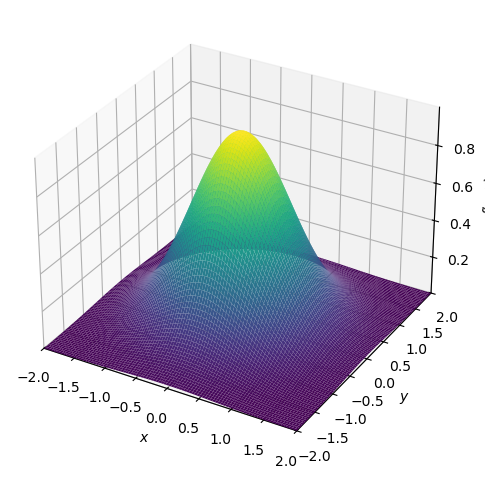

In [82]:
# Также мы можем отрисовывать трехмерные графики. 
# Для этого  стоит использовать функцию plot3d()

x = sp.Symbol('x')
y = sp.Symbol('y')
sp.plotting.plot3d(sp.exp(-x**2-y**2),
                   (x,-2,2),
                   (y,-2,2))

# 5.2 Решение линейный и нелинейных алгебраических уравнений

In [83]:
# Для создания уравнений мы можем использовать функцию sp.Eq()

x = sp.Symbol('x')
y = sp.Symbol('y')

expr = sp.Eq(x**2+y**2,0)
display(expr)

Eq(x**2 + y**2, 0)

In [84]:
# Решать же уравнения можно с помощью функции sp.solveset()


x = sp.Symbol('x')
y = sp.Symbol('y')

f = x**2 + y**2
f_solveset = sp.solveset(sp.Eq(f,0),x)
print(f_solveset)

print()
# Удобнее использовать функцию sp.solve(), которая возвращает уже список с решениями.

f_solve = sp.solve(f)
print(f_solve)

{-I*y, I*y}

[{x: -I*y}, {x: I*y}]


In [85]:
# Если мы передадим в функцию sp.solve() список с параметрами, 
# то она найдет параметры, подходящие к уравнению (методом неопределенных коэффициентов)

x = sp.Symbol('x')
y = sp.Symbol('y')
a = sp.Symbol('a')
b = sp.Symbol('b')
c = sp.Symbol('c')
e = a*x**2 + b*x+c - 2*x - 3
display(e)

e_solve = sp.solve(e, [a, b,c]) # получим {a:0, b:2, c:3}
print(e_solve)

a*x**2 + b*x + c - 2*x - 3

{a: 0, b: 2, c: 3}


-x**2 - y**2 + z**2

[-sqrt(x**2 + y**2), sqrt(x**2 + y**2)]


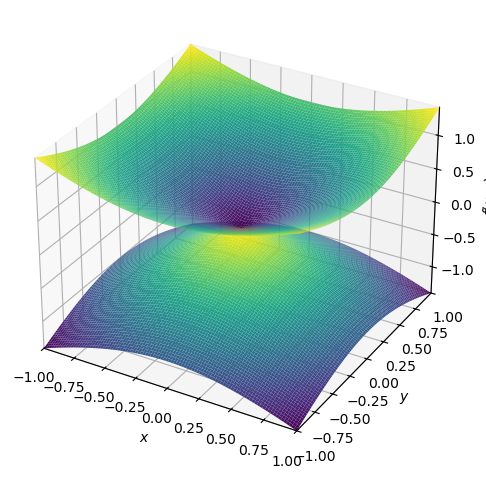

In [86]:
# Решим уравнение и нарисуем решение

x = sp.Symbol('x')
y = sp.Symbol('y')
z = sp.Symbol('z')

f = z**2 - x**2-y**2
display(f)

a = sp.solve(f,z)
print(a)
sp.plotting.plot3d(a[0],a[1],(x,-1,1),(y,-1,1))

In [87]:
# Напишите решения этого уравнения (с точностью до 4 цифр после запятой) в порядке возрастания.

x = sp.Symbol('x')

f = x**3 - 3 * x + 1

print(*sorted(map(lambda x: x.round(4), sp.solve(f, x))))

-1.8794 0.3473 1.5321


In [88]:
# Найдите решения уравнения
# Нарисуйте решение в зависимости от p и найдите число, где сливаются два решения. 
# В качестве ответа укажите ближайшее целое к нему.

x, p = sp.symbols('x p')

f = x**3 - p*x + 1
display(f)

roots = sp.solve(f, x) # корни относительно x

# ищем среди них корни относительно p:

# print(solve(roots[0]-roots[1], p)[0].n())

# print(solve(roots[0]-roots[2], p)[0].n())

print(sp.solve(roots[1] - roots[2], p)[0].n())

-p*x + x**3 + 1

1.88988157484231


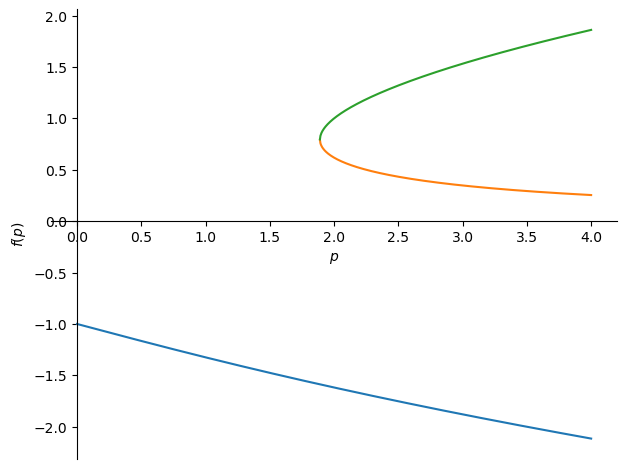

In [89]:
f = x**3 - p*x + 1
roots = sp.solve(f, x)
rng = (p, 0, 4)
sp.plot(*[(r, rng) for r in roots])

# 5.3 Решение дифференциальных уравнений

In [90]:
# Начнем с Обыкновенных дифференциальных уравнений (ОДУ). 
# В помощь нам приходит функция sp.dsolve. 
# В качестве основных аргументов она принимает уравнение, 
# которое надо решить и функцию, относительно которой нужно решить уравнение.

f = sp.Function('f')
x = sp.Symbol('x')


sp.dsolve(f(x).diff() + 9*f(x)**2, f(x))

Eq(f(x), 1/(C1 + 9*x))

In [91]:
# Если же хотим конкретизировать начальные условия, 
# то мы должны передать в функцию дополнительный аргумент, 
# являющийся словарем, где перечислены все начальные условия.

f = sp.Function('f')
x = sp.Symbol('x')
sp.dsolve(f(x).diff() + 9*f(x)**2, f(x), ics = {f(0):1})

Eq(f(x), 1/(9*x + 1))

In [92]:
# Если же мы хотим решить систему ОДУ, то тут надо воспользоваться функцией dsolve_system

from sympy.solvers.ode.systems import dsolve_system
f = sp.Function('f')
g = sp.Function('g')

eqs = [sp.Eq(f(x).diff(x,2), g(x)), sp.Eq(g(x).diff(x), f(x))]
dsolve_system(eqs, ics={f(0): 1,f(x).diff(x).subs(x,0):0, g(0): 0})

# В качестве результата получим кортеж из двух решений: решение для функции f(x) и g(x).

[[Eq(f(x), exp(x)/3 + 2*exp(-x/2)*cos(sqrt(3)*x/2)/3),
  Eq(g(x), exp(x)/3 + sqrt(3)*exp(-x/2)*sin(sqrt(3)*x/2)/3 - exp(-x/2)*cos(sqrt(3)*x/2)/3)]]

Уравнение переноса <br> <br>
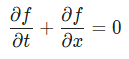

In [93]:
# Если же говорить про уравнения в частных производных, 
# то sympy хорошо справляется только с уравнениями первого порядка. 
# Модуль sympy.solvers.pde содержит много полезных методов, 
# но нас будет интересовать только метод pdsolve, который решает уравнения.
# Попробуем решить уравнение переноса:

from sympy.solvers.pde import pdsolve
from sympy.abc import x, t
f = sp.Function('f')
u = f(x, t)
ux = u.diff(x)
ut = u.diff(t)
eq = sp.Eq(ut+ux, 0)
pdsolve(eq)

Eq(f(x, t), F(-t + x))

In [94]:
# Сопоставьте уравнения и их решения 
# (f - искомая функция от переменных x и y, 
# f_x - частная производная от f по аргументу x и т.д.)

def get_diff(f):
    return pdsolve(sp.Eq(eval(f), 0))

f = sp.Function('f')
x, y = sp.symbols('x y')

u = f(x, y)
ux = u.diff(x)
uy = u.diff(y)

f1 = ux*x+uy-1/x
f2 = ux - x
f3 = ux*x+uy*y-1/x
f4 = ux*sp.exp(-x)-uy/y
f5 = ux*x**2-uy*y
f6 = ux*sp.exp(-x)-uy*y
f7 = ux/x - uy/y
f8 = ux/x + uy/y

for i in range(8):
    display(f'f{i+1}')
    display(get_diff(f'f{i+1}'))

    # print(f'Функция: {f'f{i+1}'} \nОтвет:{get_diff(f'f{i+1}')}')

'f1'

Eq(f(x, y), F(y - log(x)) - 1/x)

'f2'

Eq(f(x, y), x**2/2 + F(-y))

'f3'

Eq(f(x, y), F(y/x) - 1/x)

'f4'

Eq(f(x, y), F(y**2 + 2*exp(x)))

'f5'

Eq(f(x, y), F(y*exp(-1/x)))

'f6'

Eq(f(x, y), F(y*exp(exp(x))))

'f7'

Eq(f(x, y), F(x**2 + y**2))

'f8'

Eq(f(x, y), F(-x**2 + y**2))

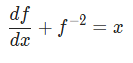

In [95]:
# Найдите решение уравнения с начальным условием f(1)=1.

f = sp.Function('f')
x = sp.Symbol('x')


res = sp.dsolve(f(x).diff() + f(x)**(-2), f(x), ics = {f(1):1})
display(res)
print(res)

Eq(f(x), (4 - 3*x)**(1/3))

Eq(f(x), (4 - 3*x)**(1/3))


In [ ]:
# Сопоставьте уравнения и решения (f = f(x), f_x - производная по x  и т.д.)

f = sp.Function('f')
x, y = sp.symbols('x y')

u = f(x)
ux = u.diff(x)

f1 = ux - 1/f(x) #, f(0) = 1
f2 = ux * x - x*f(x) #, f(0) = 0
f3 = 1/ux-sp.exp(f(x)) #, f(0) = 0
f4 = ux + f(x) + sp.exp(x) #, f(0) = 0
f5 = ux - sp.exp(f(x)) #, f(0) = 0
f6 = ux - 1/f(x) + 1 #, f(0) = 1
f7 = ux - f(x)+sp.exp(-x) #, f(0) = 1


In [97]:
print('f1')
display(sp.dsolve(f1, f(x), ics = {f(0):1}))
print('f2')
display(sp.dsolve(f2, f(x), ics = {f(0):0}))
print('f3')
display(sp.dsolve(f3, f(x), ics = {f(0):0}))
print('f4')
display(sp.dsolve(f4, f(x), ics = {f(0):0}))
print('f5')
display(sp.dsolve(f5, f(x), ics = {f(0):0}))
print('f6')
display(sp.dsolve(f6, f(x), ics = {f(0):1}))
print('f7')
display(sp.dsolve(f7, f(x), ics = {f(0):1}))

f1


Eq(f(x), sqrt(2*x + 1))

f2


Eq(f(x), 0)

f3


Eq(f(x), log(x + 1))

f4


Eq(f(x), -exp(x)/2 + exp(-x)/2)

f5


Eq(f(x), log(-1/(x - 1)))

f6


Eq(f(x), 1)

f7


Eq(f(x), exp(x)/2 + exp(-x)/2)

In [98]:
# На вход подается матрица. 
# Надо найти ее минимальное и максимальное собственные значения и их кратности 
# (четыре числа через пробел: (минимальное СЗ) (его кратность) (максимальное СЗ) (его кратность)).

# Вход: две строки. 
# Первая - размер квадратной матрицы (количество строк). 
# Вторая - элементы матрицы (вся матрица вытянута в одну строку, начиная с первой строки).

# n = int(input())
# arr = input().split()

n = 2
arr = '1 2 3 4'.split()
B = sp.Matrix(arr)
A = sp.Matrix(n, n, arr)
A

Matrix([
[1, 2],
[3, 4]])

In [99]:
lst = []
res = dict(sorted(A.eigenvals().items(), key=lambda item: item))
for k, v in res.items():
    lst.append(round(k, 5))
    lst.append(v)
    print(round(k, 5), v, end=' ')
print()
print(*lst)

-0.37228 1 5.37228 1 
-0.37228 1 5.37228 1


In [100]:
(sp.fourier_series(sp.log(x),(x,1,2)))[0]

-1 + 2*log(2)

In [109]:
n = 2
arr = sp.Matrix('1 2 3 4'.split())
B = sp.Matrix(arr)
A = sp.Matrix(n, n, arr)
A

Matrix([
[1, 2],
[3, 4]])

In [122]:
lst = []
res = A.eigenvals()
res1 = dict(sorted(res.items()))

for k, v in res1.items():
    lst.append(round(k, 5))
    lst.append(v)
    print(round(k, 5), v, end=' ')
print()
print(*lst)

B = sp.Matrix(lst)
print(*B)

-0.37228 1 5.37228 1 
-0.37228 1 5.37228 1
-0.37228 1 5.37228 1


In [ ]:
n = 2
s = '1 2 3 4'
arr = sp.Matrix(2, 2, np.array(tuple(map(float, s.split()))))

A = sp.Matrix(n, n, arr)
A

Matrix([
[1.0, 2.0],
[3.0, 4.0]])

In [136]:
n = 2
s = '1 2 3 4'
arr = np.array(tuple(map(float, s.split())))
# arr = sp.Matrix(2, 2, np.array(map(float, s.split())))
arr
A = sp.Matrix(n, n, arr)
A

Matrix([
[1.0, 2.0],
[3.0, 4.0]])

In [137]:
n = int(input())
arr = sp.Matrix(2, 2, np.array(tuple(map(float, input().split()))))
A = sp.Matrix(n, n, arr)

lst = []
res = A.eigenvals()
res1 = dict(sorted(res.items()))
for k, v in res1.items():
    lst.append(round(k, 5))
    lst.append(v)

B = sp.Matrix(lst)
print(*B)

-0.37228 1 5.37228 1
